Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Your code should run from top to bottom with no errors. Failure to do this will result in loss of points.

You should not use `install.packages()` anywhere. You may assume that we have already installed all the packages needed to run your code.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and delete the `stop()` functions, as well as your name and collaborators below:

In [1]:
NAME = "aayushap"  # your uniqname 
COLLABORATORS = c("pjmerica", "sohumm","kaspersj" )  # vector of uniqnames of your collaborators, if any
## IMPORTANT: you must also have set your group on Canvas. This is only used as a backup.

---

In [2]:
library(tidyverse)
library(stringr)
library(lubridate)
library(tidytext)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



# STATS 306
## Problem Set 7: Analyzing Twitter data
Each problem is worth two to four points, depending on difficulty, for a total of 20.

*Note*: you do not need to use `install.packages()` in this notebook. You may assume that we have already installed all of the necessary packages when we run your code.


The file `tweets.txt.gz` contains tweets from September, 2016 (a few may lay outside of this range.) The file is in a special format. The first few lines are:

In [3]:
readLines("tweets.txt.gz", n = 11)

[1] "T\t2009-06-11 00:00:03"                                                   
 [2] "U\thttp://twitter.com/imdb"                                               
 [3] "W\tNo Post Title"                                                         
 [4] ""                                                                         
 [5] "T\t2009-06-11 16:37:14"                                                   
 [6] "U\thttp://twitter.com/ncruralhealth"                                      
 [7] "W\tNo Post Title"                                                         
 [8] ""                                                                         
 [9] "T\t2009-06-11 16:56:23"                                                   
[10] "U\thttp://twitter.com/boydjones"                                          
[11] "W\tlistening to \"Big Lizard - The Dead Milkmen\" ♫ http://blip.fm/~81kwz"

Each datum consists of a triple of lines marked `T`, `U` and `W` containing the time of the tweet, the user, and the message itself, respectively. Each triple is separated by an empty line.

#### Problem 1 (2 pts.)
Read `tweets.txt.gz` in and store it as an R data frame/tibble called `tweets1`. At this point, your should have a single character column and 1.4m rows. It will look like:
```{r}
# A tibble: 1,483,985 x 1
   X1                                   
   <chr>                                
 1 "T\t2009-06-11 00:00:03"             
 2 "U\thttp://twitter.com/imdb"         
 3 "W\tNo Post Title"                   
 4 <NA>                                 
 5 "T\t2009-06-11 16:37:14"             
 6 "U\thttp://twitter.com/ncruralhealth"
 7 "W\tNo Post Title"                   
 8 <NA>                                 
 9 "T\t2009-06-11 16:56:23"             
10 "U\thttp://twitter.com/boydjones"    
# ... with 1,483,975 more rows
```
(*Note*: The `.gz` file extension indicates that this file is compressed to save space. You can load the table using the usual `tidyverse` table loading commands, as if it were a regular text file.)

In [4]:
tweets1 <- tibble(X1 = readLines("tweets.txt.gz")) %>% print

# A tibble: 1,483,985 x 1
   X1                                   
   <chr>                                
 1 "T\t2009-06-11 00:00:03"             
 2 "U\thttp://twitter.com/imdb"         
 3 "W\tNo Post Title"                   
 4 ""                                   
 5 "T\t2009-06-11 16:37:14"             
 6 "U\thttp://twitter.com/ncruralhealth"
 7 "W\tNo Post Title"                   
 8 ""                                   
 9 "T\t2009-06-11 16:56:23"             
10 "U\thttp://twitter.com/boydjones"    
# ... with 1,483,975 more rows


In [4]:
stopifnot(exists("tweets1"))

#### Problem 2 (4 pts.)
Next, convert `tweets1` so that it has three columns reflecting the three variables present in this data set. Store the resulting table in a variable called `tweets2`. The first rows of `tweets2` will now look like:
```
# A tibble: 3 x 3
  T                   U                                W                       
  <chr>               <chr>                            <chr>                   
1 2009-06-11 00:00:03 http://twitter.com/imdb          No Post Title           
2 2009-06-11 16:37:14 http://twitter.com/ncruralhealth No Post Title           
3 2009-06-11 16:56:23 http://twitter.com/boydjones     "listening to \"Big Liz…
```
(*Hint*: If you are having trouble getting this working on the full data set, try subsetting the table to a small number of rows in order to debug your code.)

In [5]:
tweets2 = tweets1 %>% mutate(group = ceiling(row_number()/4)) %>%
    mutate(key = case_when(str_detect(X1, '^T') ~ 'T',
                           str_detect(X1, '^U') ~ 'U',
                           str_detect(X1, '^W') ~ 'W',
                           )) %>%
    filter(!is.na(key)) %>% mutate(X1 = str_replace(X1, "^[T][\\s]+(f\\d-\\s:]+)", "\\1"),
                                  X1 = str_replace(X1,"^[U][\\s]+(.+)", "\\1"),
                                  X1 = str_replace(X1, "^[W][\\s]+(.+)", "\\1")) %>%
    spread(key=key, value= X1) %>%
    select(-group) %>% print


# A tibble: 370,997 x 3
   T                        U                                W                 
   <chr>                    <chr>                            <chr>             
 1 "T\t2009-06-11 00:00:03" http://twitter.com/imdb          No Post Title     
 2 "T\t2009-06-11 16:37:14" http://twitter.com/ncruralhealth No Post Title     
 3 "T\t2009-06-11 16:56:23" http://twitter.com/boydjones     "listening to \"B…
 4 "T\t2009-06-11 16:56:59" http://twitter.com/cameron987    @beatrizchavez A …
 5 "T\t2009-06-11 16:57:03" http://twitter.com/selenato      @okaaaa 本当ね！2週間楽し…
 6 "T\t2009-06-11 16:57:30" http://twitter.com/nbeasley10    Just got a chance…
 7 "T\t2009-06-11 16:57:31" http://twitter.com/littlewing333 @kidhum and if an…
 8 "T\t2009-06-11 16:57:33" http://twitter.com/lolcute       mebbe U fetch htt…
 9 "T\t2009-06-11 16:57:36" http://twitter.com/fr0st22       I have broken 1,0…
10 "T\t2009-06-11 16:57:59" http://twitter.com/mavellsyrup   Food timmeeee :'D 
# ... with 370,9

In [6]:
stopifnot(exists("tweets2"))

#### Problem 3 (2 pts.)
Convert the `T` column to a properly formatted R datetime object and give it (and the rest of the columns) an appropriate name. Also, strip off the leading `http://twitter.com/` from each user. Store the resulting table as `tweets3`. It will look like:
```
# A tibble: 370,997 x 3
   time                user          tweet                                     
   <dttm>              <chr>         <chr>                                     
 1 2009-06-11 00:00:03 imdb          No Post Title                             
 2 2009-06-11 16:37:14 ncruralhealth No Post Title                             
 3 2009-06-11 16:56:23 boydjones     "listening to \"Big Lizard - The Dead Mil…
 4 2009-06-11 16:56:59 cameron987    @beatrizchavez A dork? NO way... you are.…
 5 2009-06-11 16:57:03 selenato      @okaaaa 本当ね！2週間楽しみがありすぎわ、まじで…本当きどうさんへの愛がこ…
 6 2009-06-11 16:57:30 nbeasley10    Just got a chance to buy All-Star tickets…
 7 2009-06-11 16:57:31 littlewing333 @kidhum and if an act has pull and they d…
 8 2009-06-11 16:57:33 lolcute       mebbe U fetch http://tinyurl.com/nz4fbr   
 9 2009-06-11 16:57:36 fr0st22       I have broken 1,000 twitter updates. Paaa…
10 2009-06-11 16:57:59 mavellsyrup   Food timmeeee :'D                         
# ... with 370,987 more rows
```

In [6]:
tweets3 <- tweets2 %>% mutate(T = ymd_hms(T)) %>% mutate(garbage = str_replace(U, 'http://twitter.com/', '')) %>% 
rename(time = T, user = garbage , tweet = W) %>% select(time, user, tweet) %>% print


# A tibble: 370,997 x 3
   time                user          tweet                                     
   <dttm>              <chr>         <chr>                                     
 1 2009-06-11 00:00:03 imdb          No Post Title                             
 2 2009-06-11 16:37:14 ncruralhealth No Post Title                             
 3 2009-06-11 16:56:23 boydjones     "listening to \"Big Lizard - The Dead Mil…
 4 2009-06-11 16:56:59 cameron987    @beatrizchavez A dork? NO way... you are.…
 5 2009-06-11 16:57:03 selenato      @okaaaa 本当ね！2週間楽しみがありすぎわ、まじで…本当きどうさんへの愛がこ…
 6 2009-06-11 16:57:30 nbeasley10    Just got a chance to buy All-Star tickets…
 7 2009-06-11 16:57:31 littlewing333 @kidhum and if an act has pull and they d…
 8 2009-06-11 16:57:33 lolcute       mebbe U fetch http://tinyurl.com/nz4fbr   
 9 2009-06-11 16:57:36 fr0st22       I have broken 1,000 twitter updates. Paaa…
10 2009-06-11 16:57:59 mavellsyrup   Food timmeeee :'D                         
# ... with 370,9

In [8]:
stopifnot(exists("tweets3"))

#### Problem 4 (2 pts.)
Plot the total number of tweets by hour in `tweets3`. What is the busiest/least busy time of day for tweeting?

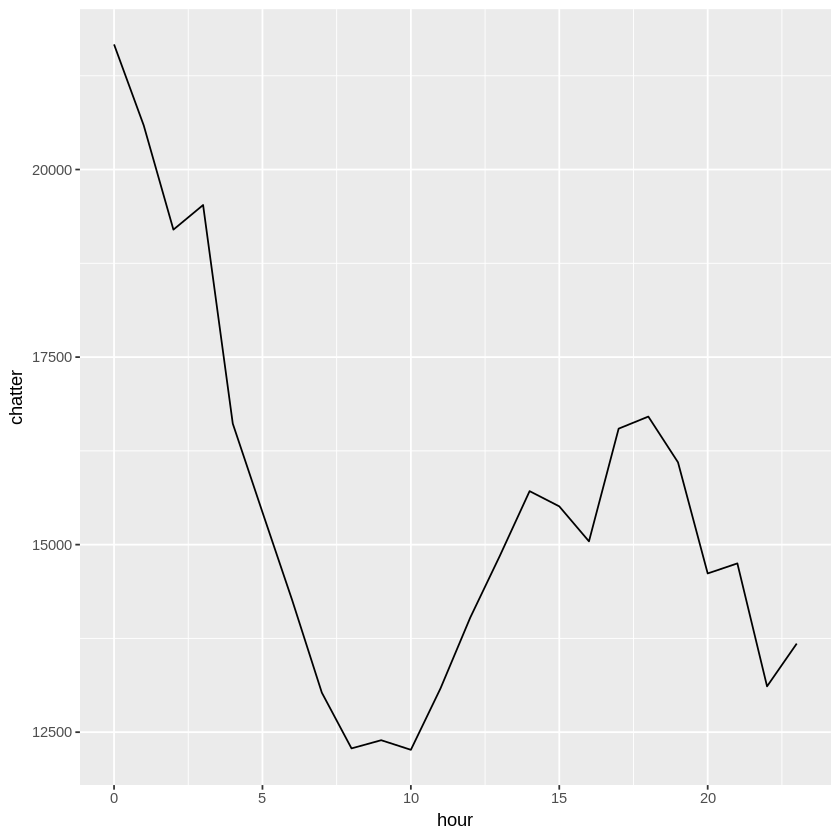

In [7]:
tweets4 = tweets3 %>% mutate(hour = hour(time)) %>% 
    group_by(hour) %>% mutate(chatter = n()) %>% select(hour, chatter)

ggplot(tweets4, aes(x=hour, y=chatter)) + geom_line()


# Busiest time of the day is midnight (00:00) and the least busiest time is around 8:00am

### Sentiment analysis of Twitter data
*Sentiment analysis* tries to assign a numerical sentiment score to written language. Positive language has a positive sentiment score and similarly for negative language. We will use the `tidytext` package to perform sentiment analysis on the `tweets3` table.

In [12]:
# you may need to install this if not working on server. anaconda package: r-tidytext
library(tidytext)

The `tidytext` package returns a table which assigns sentiment scores to common words:

In [8]:
sents <- get_sentiments("afinn") %>% print

# A tibble: 2,476 x 2
   word       score
   <chr>      <int>
 1 abandon       -2
 2 abandoned     -2
 3 abandons      -2
 4 abducted      -2
 5 abduction     -2
 6 abductions    -2
 7 abhor         -3
 8 abhorred      -3
 9 abhorrent     -3
10 abhors        -3
# ... with 2,466 more rows


#### Problem 5 (4 pts.)
Define the sentiment score of each tweet in `tweets3` to be the sum of all the sentiment scores for all matching words in the `sents` table. For example, if the tweet says `I abhor abductions`, then, from the above table, it would get a sentiment score of -5. (If a tweet does not have any matching sentiment words, assign it a score of zero.)

Use the `tidytext::unnest_tokens()` function to generate sentiment scores for each tweet in `tweets3`. Store the result in a table called `tweets5`. The first rows will be: 
```
# A tibble: 5 x 4
# Groups:   time, user [5]
  time                user          tweet                                 score
  <dttm>              <chr>         <chr>                                 <int>
1 2009-06-11 00:00:03 imdb          No Post Title                            -1
2 2009-06-11 16:37:14 ncruralhealth No Post Title                            -1
3 2009-06-11 16:56:23 boydjones     "listening to \"Big Lizard - The Dea…    -2
4 2009-06-11 16:56:59 cameron987    @beatrizchavez A dork? NO way... you…    -3
5 2009-06-11 16:57:30 nbeasley10    Just got a chance to buy All-Star ti…     5
```

In [9]:
Socialscore = tweets3 %>% unnest_tokens(word, tweet) %>% left_join(sents, by = 'word') %>%
mutate(score = ifelse(is.na(score), 0, score)) %>% group_by(time, user) %>%
summarize(score = sum(score))
tweets5 = tweets3 %>% left_join(Socialscore)
head(tweets5)


Joining, by = c("time", "user")


time,user,tweet,score
2009-06-11 00:00:03,imdb,No Post Title,-1
2009-06-11 16:37:14,ncruralhealth,No Post Title,-1
2009-06-11 16:56:23,boydjones,"listening to ""Big Lizard - The Dead Milkmen"" ♫ http://blip.fm/~81kwz",-2
2009-06-11 16:56:59,cameron987,@beatrizchavez A dork? NO way... you are. I just have no shame... I #squarespace want #squarespace that #squarespace iPhone #squarespace.,-3
2009-06-11 16:57:03,selenato,@okaaaa 本当ね！2週間楽しみがありすぎわ、まじで…本当きどうさんへの愛がこんな形になるとは…イナズマ大人のアニメだわ＞＜,0
2009-06-11 16:57:30,nbeasley10,Just got a chance to buy All-Star tickets tomorrow. God Bless the Cardinals,5


In [13]:
stopifnot(exists("tweets5"))

#### Problem 6 (2 pts.)
Make a box plot of sentiment score by day of the week. On which day(s) do people seem happiest? Least happy? Are these differences significant? Explain your reasoning.

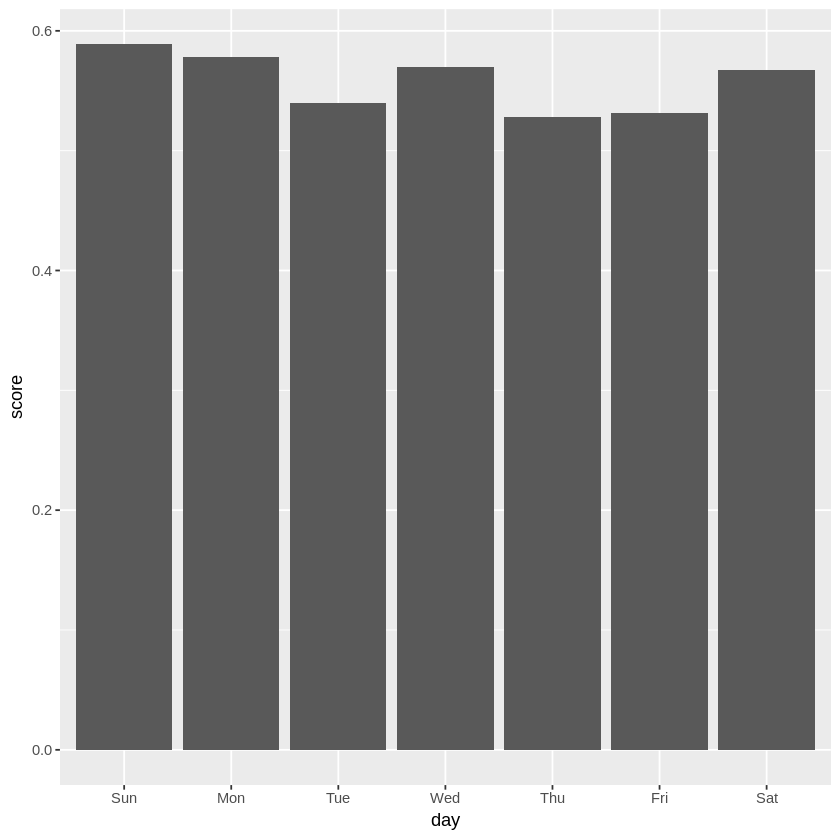

In [10]:
tweets6 = tweets5 %>% mutate(day = wday(time, label = T))

tweets_plotted = tweets6 %>% group_by(day) %>% summarize(score = mean(score, na.rm=T)) %>% arrange(-score)
ggplot(tweets_plotted) + geom_bar(aes(x = day, y = score), stat = "identity")

# People appear to be happiest on Sunday and saddest on Thursday. However, there do not appear to be 
# significant differences as the averages scores all appear to be around .55-.58. There is likely not a significant difference.


#### Problem 7 (4 pts.)
Since this is a data science class, and nothing says data science like a word cloud, we are going to make a word cloud. The `wordcloud` package can be used for this:

Loading required package: RColorBrewer


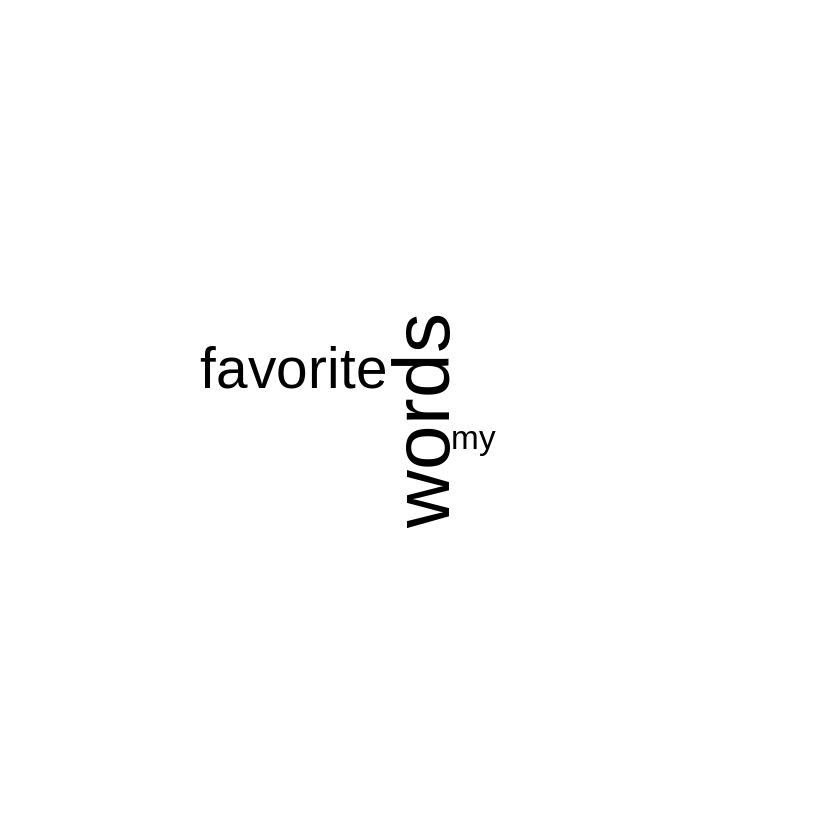

In [11]:
# again, you'll need to install if not on the server.
library(wordcloud)
wordcloud(words=c("my", "favorite", "words"), freq=c(10, 20, 30))
          #     the words                          freq. of each word

Create a wordcloud of the 100 most common words occuring in the 1000 most positive tweets when ordered according to sentiment score. 

(*Hint*: to make a nicer graphic, consider removing so-called stop words ("the", "and", "or", etc.) before computing the top 100. Use `anti_join()` along with `tidytext::stop_words`.)

Selecting by score
Selecting by n


# A tibble: 105 x 2
   word        n
   <chr>   <int>
 1 rt        569
 2 love      498
 3 http      493
 4 lol       345
 5 wow       218
 6 fun       192
 7 win       189
 8 happy     169
 9 bit.ly    168
10 awesome   152
# ... with 95 more rows


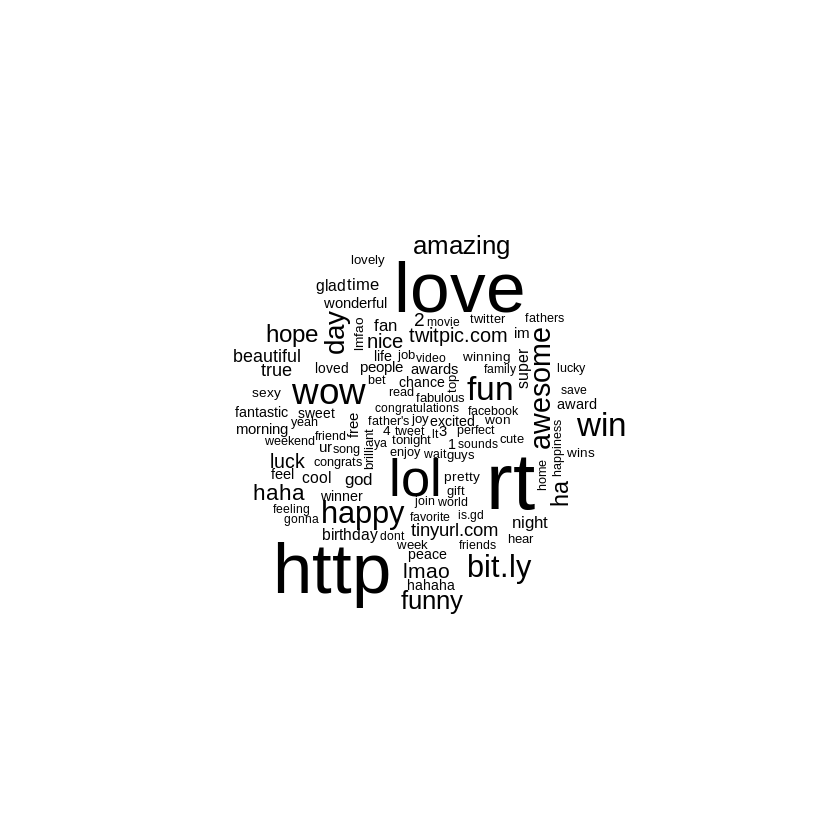

In [12]:
Krumpstince = tweets5 %>% arrange(-score) %>% top_n(1000) %>% unnest_tokens(word, tweet) %>%
anti_join(tidytext::stop_words, by = "word") %>% group_by(word) %>% summarize(n = n()) %>% arrange(-n) %>%
top_n(100) %>% print
wordcloud(Krumpstince$word, Krumpstince$n)


#### Anti-problem 8 (-4 pts.)
Do *not* repeat the above exercise for the most negative tweets.